In [1]:
import os
import os.path
import random
from operator import add
from datetime import datetime, date, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import shutil
import time

from scipy.integrate import simps
from numpy import trapz
from decimal import Decimal, ROUND_DOWN, ROUND_UP

In [2]:
pd.set_option('display.max_columns',69)
pd.set_option('display.max_rows',119)

In [3]:
# load the data
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case1_sattel-hochstuckli\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case2_Atzmaening\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1339\setup1'
root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1822\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2000\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2500\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b1564\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2141\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2584\setup1'

rootOut = os.path.join(root, 'Results_3')
df_final_tipping_point_1980 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_1980.csv'))
df_final_tipping_point_2020 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_2020.csv'))
df_final_tipping_point_2050 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_2050.csv'))
df_final_tipping_point_2070 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_2070.csv'))

df_policies = pd.read_csv(os.path.join(rootOut, 'df_policies.csv'))

In [4]:
df_final_tipping_point_1980

,tippingPoint26_1980,tippingPoint26_1_1980,scenario26_1980,policy26_1980,tippingPoint45_1980,tippingPoint45_1_1980,scenario45_1980,policy45_1980,tippingPoint85_1980,tippingPoint85_1_1980,scenario85_1980,policy85_1980
0,0.0,2.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,2.0
1,2.0,4.0,0.0,6.0,4.0,4.0,0.0,1.0,5.0,4.0,0.0,5.0
2,4.0,4.0,0.0,7.0,4.0,3.0,0.0,4.0,4.0,5.0,0.0,9.0
3,4.0,3.0,0.0,8.0,3.0,4.0,0.0,10.0,5.0,2.0,0.0,11.0
4,3.0,6.0,0.0,18.0,4.0,4.0,0.0,14.0,2.0,5.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3056,NaN,NaN,NaN,NaN,0.0,0.0,44.0,190.0,NaN,NaN,NaN,NaN
3057,NaN,NaN,NaN,NaN,0.0,0.0,44.0,193.0,NaN,NaN,NaN,NaN
3058,NaN,NaN,NaN,NaN,0.0,1.0,44.0,195.0,NaN,NaN,NaN,NaN
3059,NaN,NaN,NaN,NaN,1.0,0.0,44.0,196.0,NaN,NaN,NaN,NaN


In [5]:
#####Scenario_26####

tippingPoint26_All_1980 = df_final_tipping_point_1980['tippingPoint26_1980'].value_counts()
tippingPoint26_Accepted_1980 = df_final_tipping_point_1980['tippingPoint26_1_1980'].value_counts()
scenario26_1980 = df_final_tipping_point_1980['scenario26_1980'].value_counts()
policy26_1980 = df_final_tipping_point_1980['policy26_1980'].value_counts()

tippingPoint26_All_2020 = df_final_tipping_point_2020['tippingPoint26_2020'].value_counts()
tippingPoint26_Accepted_2020 = df_final_tipping_point_2020['tippingPoint26_1_2020'].value_counts()
scenario26_2020 = df_final_tipping_point_2020['scenario26_2020'].value_counts()
policy26_2020 = df_final_tipping_point_2020['policy26_2020'].value_counts()

tippingPoint26_All_2050 = df_final_tipping_point_2050['tippingPoint26_2050'].value_counts()
tippingPoint26_Accepted_2050 = df_final_tipping_point_2050['tippingPoint26_1_2050'].value_counts()
scenario26_2050 = df_final_tipping_point_2050['scenario26_2050'].value_counts()
policy26_2050 = df_final_tipping_point_2050['policy26_2050'].value_counts()

tippingPoint26_All_2070 = df_final_tipping_point_2070['tippingPoint26_2070'].value_counts()
tippingPoint26_Accepted_2070 = df_final_tipping_point_2070['tippingPoint26_1_2070'].value_counts()
scenario26_2070 = df_final_tipping_point_2070['scenario26_2070'].value_counts()
policy26_2070 = df_final_tipping_point_2070['policy26_2070'].value_counts()

#####Scenario_45####

tippingPoint45_All_1980 = df_final_tipping_point_1980['tippingPoint45_1980'].value_counts()
tippingPoint45_Accepted_1980 = df_final_tipping_point_1980['tippingPoint45_1_1980'].value_counts()
scenario45_1980 = df_final_tipping_point_1980['scenario45_1980'].value_counts()
policy45_1980 = df_final_tipping_point_1980['policy45_1980'].value_counts()

tippingPoint45_All_2020 = df_final_tipping_point_2020['tippingPoint45_2020'].value_counts()
tippingPoint45_Accepted_2020 = df_final_tipping_point_2020['tippingPoint45_1_2020'].value_counts()
scenario45_2020 = df_final_tipping_point_2020['scenario45_2020'].value_counts()
policy45_2020 = df_final_tipping_point_2020['policy45_2020'].value_counts()

tippingPoint45_All_2050 = df_final_tipping_point_2050['tippingPoint45_2050'].value_counts()
tippingPoint45_Accepted_2050 = df_final_tipping_point_2050['tippingPoint45_1_2050'].value_counts()
scenario45_2050 = df_final_tipping_point_2050['scenario45_2050'].value_counts()
policy45_2050 = df_final_tipping_point_2050['policy45_2050'].value_counts()

tippingPoint45_All_2070 = df_final_tipping_point_2070['tippingPoint45_2070'].value_counts()
tippingPoint45_Accepted_2070 = df_final_tipping_point_2070['tippingPoint45_1_2070'].value_counts()
scenario45_2070 = df_final_tipping_point_2070['scenario45_2070'].value_counts()
policy45_2070 = df_final_tipping_point_2070['policy45_2070'].value_counts()

#####Scenario_85####

tippingPoint85_All_1980 = df_final_tipping_point_1980['tippingPoint85_1980'].value_counts()
tippingPoint85_Accepted_1980 = df_final_tipping_point_1980['tippingPoint85_1_1980'].value_counts()
scenario85_1980 = df_final_tipping_point_1980['scenario85_1980'].value_counts()
policy85_1980 = df_final_tipping_point_1980['policy85_1980'].value_counts()

tippingPoint85_All_2020 = df_final_tipping_point_2020['tippingPoint85_2020'].value_counts()
tippingPoint85_Accepted_2020 = df_final_tipping_point_2020['tippingPoint85_1_2020'].value_counts()
scenario85_2020 = df_final_tipping_point_2020['scenario85_2020'].value_counts()
policy85_2020 = df_final_tipping_point_2020['policy85_2020'].value_counts()

tippingPoint85_All_2050 = df_final_tipping_point_2050['tippingPoint85_2050'].value_counts()
tippingPoint85_Accepted_2050 = df_final_tipping_point_2050['tippingPoint85_1_2050'].value_counts()
scenario85_2050 = df_final_tipping_point_2050['scenario85_2050'].value_counts()
policy85_2050 = df_final_tipping_point_2050['policy85_2050'].value_counts()

tippingPoint85_All_2070 = df_final_tipping_point_2070['tippingPoint85_2070'].value_counts()
tippingPoint85_Accepted_2070 = df_final_tipping_point_2070['tippingPoint85_1_2070'].value_counts()
scenario85_2070 = df_final_tipping_point_2070['scenario85_2070'].value_counts()
policy85_2070 = df_final_tipping_point_2070['policy85_2070'].value_counts()

In [6]:
a1 = pd.DataFrame(tippingPoint26_All_1980.reset_index().values, columns=["freq26_tip_all_1980", "tippingPoint26_all_1980"])
a2 = pd.DataFrame(tippingPoint26_Accepted_1980.reset_index().values, columns=["freq26_tipacc_1980", "tippingPoint26_acc_1980"])
a3 = pd.DataFrame(scenario26_1980.reset_index().values, columns=["Policy26_1980", "freq26_1980_policy"])
a4 = pd.DataFrame(policy26_1980.reset_index().values, columns=["scenario26_1980", "freq26_1980_scenario"])

a5 = pd.DataFrame(tippingPoint26_All_2020.reset_index().values, columns=["freq26_tip_all_2020", "tippingPoint26_all_2020"])
a6 = pd.DataFrame(tippingPoint26_Accepted_2020.reset_index().values, columns=["freq26_tipacc_2020", "tippingPoint26_acc_2020"])
a7 = pd.DataFrame(scenario26_2020.reset_index().values, columns=["Policy26_2020", "freq26_2020_policy"])
a8 = pd.DataFrame(policy26_2020.reset_index().values, columns=["scenario26_2020", "freq26_2020_scenario"])

a9 = pd.DataFrame(tippingPoint26_All_2050.reset_index().values, columns=["freq26_tip_all_2050", "tippingPoint26_all_2050"])
a10 = pd.DataFrame(tippingPoint26_Accepted_2050.reset_index().values, columns=["freq26_tipacc_2050", "tippingPoint26_acc_2050"])
a11 = pd.DataFrame(scenario26_2050.reset_index().values, columns=["Policy26_2050", "freq26_2050_policy"])
a12 = pd.DataFrame(policy26_2050.reset_index().values, columns=["scenario26_2050", "freq26_2050_scenario"])

a13 = pd.DataFrame(tippingPoint26_All_2070.reset_index().values, columns=["freq26_tip_all_2070", "tippingPoint26_all_2070"])
a14 = pd.DataFrame(tippingPoint26_Accepted_2070.reset_index().values, columns=["freq26_tipacc_2070", "tippingPoint26_acc_2070"])
a15 = pd.DataFrame(scenario26_2070.reset_index().values, columns=["Policy26_2070", "freq26_2070_policy"])
a16 = pd.DataFrame(policy26_2070.reset_index().values, columns=["scenario26_2070", "freq26_2070_scenario"])

b1= pd.DataFrame(tippingPoint45_All_1980.reset_index().values, columns=["freq45_tip_all_1980", "tippingPoint45_all_1980"])
b2= pd.DataFrame(tippingPoint45_Accepted_1980.reset_index().values, columns=["freq45_tipacc_1980", "tippingPoint45_acc_1980"])
b3= pd.DataFrame(scenario45_1980.reset_index().values, columns=["Policy45_1980", "freq45_1980_policy"])
b4= pd.DataFrame(policy45_1980.reset_index().values, columns=["scenario45_1980", "freq45_1980_scenario"])

b5 = pd.DataFrame(tippingPoint45_All_2020.reset_index().values, columns=["freq45_tip_all_2020", "tippingPoint45_all_2020"])
b6 = pd.DataFrame(tippingPoint45_Accepted_2020.reset_index().values, columns=["freq45_tipacc_2020", "tippingPoint45_acc_2020"])
b7 = pd.DataFrame(scenario45_2020.reset_index().values, columns=["Policy45_2020", "freq45_2020_policy"])
b8 = pd.DataFrame(policy45_2020.reset_index().values, columns=["scenario45_2020", "freq45_2020_scenario"])

b9 = pd.DataFrame(tippingPoint45_All_2050.reset_index().values, columns=["freq45_tip_all_2050", "tippingPoint45_all_2050"])
b10 = pd.DataFrame(tippingPoint45_Accepted_2050.reset_index().values, columns=["freq45_tipacc_2050", "tippingPoint45_acc_2050"])
b11 = pd.DataFrame(scenario45_2050.reset_index().values, columns=["Policy45_2050", "freq45_2050_policy"])
b12 = pd.DataFrame(policy45_2050.reset_index().values, columns=["scenario45_2050", "freq45_2050_scenario"])

b13 = pd.DataFrame(tippingPoint45_All_2070.reset_index().values, columns=["freq45_tip_all_2070", "tippingPoint45_all_2070"])
b14 = pd.DataFrame(tippingPoint45_Accepted_2070.reset_index().values, columns=["freq45_tipacc_2070", "tippingPoint45_acc_2070"])
b15 = pd.DataFrame(scenario45_2070.reset_index().values, columns=["Policy45_2070", "freq45_2070_policy"])
b16 = pd.DataFrame(policy45_2070.reset_index().values, columns=["scenario45_2070", "freq45_2070_scenario"])

c1= pd.DataFrame(tippingPoint45_All_1980.reset_index().values, columns=["freq85_tip_all_1980", "tippingPoint85_all_1980"])
c2= pd.DataFrame(tippingPoint45_Accepted_1980.reset_index().values, columns=["freq85_tipacc_1980", "tippingPoint85_acc_1980"])
c3= pd.DataFrame(scenario45_1980.reset_index().values, columns=["Policy85_1980", "freq85_1980_policy"])
c4= pd.DataFrame(policy45_1980.reset_index().values, columns=["scenario85_1980", "freq85_1980_scenario"])

c5 = pd.DataFrame(tippingPoint45_All_2020.reset_index().values, columns=["freq85_tip_all_2020", "tippingPoint85_all_2020"])
c6 = pd.DataFrame(tippingPoint45_Accepted_2020.reset_index().values, columns=["freq85_tipacc_2020", "tippingPoint85_acc_2020"])
c7 = pd.DataFrame(scenario45_2020.reset_index().values, columns=["Policy85_2020", "freq85_2020_policy"])
c8 = pd.DataFrame(policy45_2020.reset_index().values, columns=["scenario85_2020", "freq85_2020_scenario"])

c9 = pd.DataFrame(tippingPoint45_All_2050.reset_index().values, columns=["freq85_tip_all_2050", "tippingPoint85_all_2050"])
c10 = pd.DataFrame(tippingPoint45_Accepted_2050.reset_index().values, columns=["freq85_tipacc_2050", "tippingPoint85_acc_2050"])
c11 = pd.DataFrame(scenario45_2050.reset_index().values, columns=["Policy85_2050", "freq85_2050_policy"])
c12 = pd.DataFrame(policy45_2050.reset_index().values, columns=["scenario85_2050", "freq85_2050_scenario"])

c13 = pd.DataFrame(tippingPoint85_All_2070.reset_index().values, columns=["freq85_tip_all_2070", "tippingPoint85_all_2070"])
c14 = pd.DataFrame(tippingPoint85_Accepted_2070.reset_index().values, columns=["freq85_tipacc_2070", "tippingPoint85_acc_2070"])
c15 = pd.DataFrame(scenario85_2070.reset_index().values, columns=["Policy85_2070", "freq85_2070_policy"])
c16 = pd.DataFrame(policy85_2070.reset_index().values, columns=["scenario85_2070", "freq85_2070_scenario"])

In [7]:
df_final_tipping_point_1980_2070 = pd.concat((a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16,
                                             b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16,
                                             c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16), axis = 1)
df_final_tipping_point_1980_2070.to_csv(os.path.join(rootOut, 'df_final_tipping_point_1980_2070.csv'), index = False)

In [8]:
df_final_tipping_point_1980_2070.shape

(68, 96)

In [9]:
df_final_tipping_point_1980_2070.head(67)

,freq26_tip_all_1980,tippingPoint26_all_1980,freq26_tipacc_1980,tippingPoint26_acc_1980,Policy26_1980,freq26_1980_policy,scenario26_1980,freq26_1980_scenario,freq26_tip_all_2020,tippingPoint26_all_2020,freq26_tipacc_2020,tippingPoint26_acc_2020,Policy26_2020,freq26_2020_policy,scenario26_2020,freq26_2020_scenario,freq26_tip_all_2050,tippingPoint26_all_2050,freq26_tipacc_2050,tippingPoint26_acc_2050,Policy26_2050,freq26_2050_policy,scenario26_2050,freq26_2050_scenario,freq26_tip_all_2070,tippingPoint26_all_2070,freq26_tipacc_2070,tippingPoint26_acc_2070,Policy26_2070,freq26_2070_policy,scenario26_2070,freq26_2070_scenario,freq45_tip_all_1980,tippingPoint45_all_1980,...,scenario45_2070,freq45_2070_scenario,freq85_tip_all_1980,tippingPoint85_all_1980,freq85_tipacc_1980,tippingPoint85_acc_1980,Policy85_1980,freq85_1980_policy,scenario85_1980,freq85_1980_scenario,freq85_tip_all_2020,tippingPoint85_all_2020,freq85_tipacc_2020,tippingPoint85_acc_2020,Policy85_2020,freq85_2020_policy,scenario85_2020,freq85_2020_scenario,freq85_tip_all_2050,tippingPoint85_all_2050,freq85_tipacc_2050,tippingPoint85_acc_2050,Policy85_2050,freq85_2050_policy,scenario85_2050,freq85_2050_scenario,freq85_tip_all_2070,tippingPoint85_all_2070,freq85_tipacc_2070,tippingPoint85_acc_2070,Policy85_2070,freq85_2070_policy,scenario85_2070,freq85_2070_scenario
0,0.0,1485.0,0.0,1484.0,43.0,66.0,173.0,45.0,1.0,615.0,1.0,615.0,43.0,66.0,162.0,37.0,2.0,552.0,2.0,552.0,43.0,66.0,60.0,35.0,0.0,506.0,0.0,505.0,39.0,66.0,61.0,35.0,0.0,1278.0,...,23.0,22.0,0.0,1278.0,0.0,1277.0,43.0,68.0,135.0,45.0,0.0,530.0,0.0,529.0,43.0,68.0,148.0,39.0,5.0,446.0,0.0,304.0,21.0,64.0,54.0,25.0,9.0,1195.0,4.0,12.0,17.0,3.0,181.0,2.0
1,2.0,478.0,2.0,478.0,21.0,66.0,64.0,45.0,0.0,528.0,0.0,527.0,29.0,66.0,106.0,37.0,1.0,402.0,1.0,402.0,39.0,66.0,158.0,34.0,1.0,431.0,1.0,431.0,17.0,66.0,56.0,34.0,2.0,504.0,...,127.0,20.0,2.0,504.0,2.0,504.0,21.0,68.0,184.0,45.0,1.0,507.0,1.0,507.0,39.0,68.0,127.0,39.0,6.0,433.0,4.0,302.0,43.0,63.0,172.0,25.0,8.0,1040.0,2.0,1.0,39.0,2.0,146.0,2.0
2,1.0,434.0,1.0,434.0,19.0,66.0,105.0,45.0,2.0,487.0,2.0,487.0,9.0,66.0,3.0,36.0,0.0,350.0,0.0,349.0,17.0,66.0,106.0,34.0,4.0,419.0,4.0,419.0,38.0,65.0,25.0,34.0,1.0,469.0,...,0.0,20.0,1.0,469.0,1.0,469.0,19.0,68.0,76.0,45.0,2.0,481.0,2.0,481.0,37.0,68.0,150.0,38.0,8.0,380.0,3.0,287.0,17.0,62.0,14.0,25.0,7.0,530.0,NaN,NaN,37.0,2.0,166.0,1.0
3,4.0,247.0,4.0,247.0,18.0,66.0,83.0,45.0,5.0,343.0,3.0,302.0,15.0,66.0,178.0,36.0,5.0,348.0,4.0,347.0,21.0,66.0,140.0,33.0,6.0,368.0,3.0,343.0,20.0,65.0,162.0,33.0,4.0,343.0,...,88.0,20.0,4.0,343.0,4.0,343.0,18.0,68.0,88.0,45.0,3.0,411.0,3.0,411.0,9.0,68.0,72.0,37.0,7.0,310.0,2.0,250.0,39.0,61.0,88.0,24.0,6.0,150.0,NaN,NaN,38.0,2.0,74.0,1.0
4,3.0,218.0,3.0,218.0,17.0,66.0,149.0,45.0,3.0,302.0,4.0,292.0,17.0,66.0,163.0,36.0,4.0,347.0,3.0,307.0,38.0,66.0,38.0,33.0,5.0,354.0,2.0,271.0,21.0,65.0,144.0,33.0,3.0,283.0,...,108.0,20.0,3.0,283.0,3.0,283.0,17.0,68.0,92.0,45.0,4.0,335.0,4.0,335.0,44.0,68.0,91.0,37.0,0.0,305.0,1.0,172.0,38.0,61.0,127.0,24.0,5.0,42.0,NaN,NaN,44.0,1.0,39.0,1.0
5,5.0,82.0,5.0,82.0,16.0,66.0,81.0,45.0,4.0,292.0,NaN,NaN,20.0,66.0,18.0,36.0,6.0,323.0,NaN,NaN,44.0,65.0,155.0,33.0,3.0,343.0,NaN,NaN,43.0,64.0,198.0,33.0,5.0,127.0,...,55.0,20.0,5.0,127.0,5.0,127.0,16.0,68.0,100.0,45.0,5.0,311.0,NaN,NaN,17.0,68.0,88.0,37.0,4.0,302.0,NaN,NaN,44.0,54.0,91.0,23.0,4.0,12.0,NaN,NaN,43.0,1.0,168.0,1.0
6,6.0,27.0,6.0,27.0,15.0,66.0,199.0,45.0,6.0,239.0,NaN,NaN,21.0,66.0,7.0,36.0,3.0,307.0,NaN,NaN,20.0,64.0,147.0,33.0,2.0,271.0,NaN,NaN,37.0,63.0,60.0,33.0,6.0,54.0,...,91.0,19.0,6.0,54.0,6.0,54.0,15.0,68.0,108.0,45.0,6.0,258.0,NaN,NaN,20.0,68.0,193.0,37.0,3.0,287.0,NaN,NaN,37.0,52.0,177.0,23.0,2.0,1.0,NaN,NaN,26.0,1.0,57.0,1.0
7,NaN,NaN,NaN,NaN,14.0,66.0,155.0,45.0,7.0,125.0,NaN,NaN,41.0,66.0,121.0,36.0,7.0,237.0,NaN,NaN,37.0,63.0,47.0,32.0,7.0,221.0,NaN,NaN,44.0,63.0,149.0,33.0,7.0,3.0,...,161.0,19.0,7.0,3.0,7.0,3.0,14.0,68.0,160.0,45.0,7.0,181.0,NaN,NaN,38.0,68.0,123.0,37.0,2.0,2

In [10]:
adpation_Option1 = np.array(df_policies['x1SnowThershold'])
adpation_Option2 = np.array(df_policies['xGoodDays'])
all_Policies = []

for i in range(len(adpation_Option1)):
    all_Policies.append('P' + '_' + str(int(adpation_Option1[i])) + '_' + str(int(adpation_Option2[i])))

In [11]:
#all_Policies

In [12]:
#df_final_tipping_point_1980_2070['Policy26_2020'] = df_final_tipping_point_1980_2070['Policy26_2020'].apply(lambda x: 'Plc_' + str(x))

In [13]:
#df_final_tipping_point_1980_2070['Policy26_2050'] = df_final_tipping_point_1980_2070['Policy26_2050'].apply(lambda x: 'Plc_' + str(x))

In [14]:
#df_final_tipping_point_1980_2070['Policy26_2070'] = df_final_tipping_point_1980_2070['Policy26_2070'].apply(lambda x: 'Plc_' + str(x))

In [15]:
x_26 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy26_2020'].to_list()
y_26 = df_final_tipping_point_1980_2070.loc[0:44, 'freq26_2020_policy'].to_list()
x1_26 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy26_2050'].to_list()
y1_26 = df_final_tipping_point_1980_2070.loc[0:44, 'freq26_2050_policy'].to_list()
x2_26 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy26_2070'].to_list()
y2_26 = df_final_tipping_point_1980_2070.loc[0:44, 'freq26_2070_policy'].to_list()

In [16]:
x_45 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy45_2020'].to_list()
y_45 = df_final_tipping_point_1980_2070.loc[0:44, 'freq45_2020_policy'].to_list()
x1_45 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy45_2050'].to_list()
y1_45 = df_final_tipping_point_1980_2070.loc[0:44, 'freq45_2050_policy'].to_list()
x2_45 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy45_2070'].to_list()
y2_45 = df_final_tipping_point_1980_2070.loc[0:44, 'freq45_2070_policy'].to_list()

In [17]:
x_85 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy85_2020'].to_list()
y_85 = df_final_tipping_point_1980_2070.loc[0:44, 'freq85_2020_policy'].to_list()
x1_85 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy85_2050'].to_list()
y1_85 = df_final_tipping_point_1980_2070.loc[0:44, 'freq85_2050_policy'].to_list()
x2_85 = df_final_tipping_point_1980_2070.loc[0:7, 'Policy85_2070'].to_list()
y2_85 = df_final_tipping_point_1980_2070.loc[0:7, 'freq85_2070_policy'].to_list()

In [19]:
x_85

[43.0,
 39.0,
 37.0,
 9.0,
 44.0,
 17.0,
 20.0,
 38.0,
 21.0,
 29.0,
 15.0,
 41.0,
 25.0,
 22.0,
 12.0,
 36.0,
 35.0,
 26.0,
 42.0,
 10.0,
 4.0,
 5.0,
 28.0,
 11.0,
 33.0,
 31.0,
 3.0,
 16.0,
 2.0,
 14.0,
 19.0,
 1.0,
 13.0,
 8.0,
 34.0,
 6.0,
 23.0,
 32.0,
 18.0,
 40.0,
 30.0,
 0.0,
 27.0,
 24.0,
 7.0]

In [20]:
y_85

[68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 66.0,
 65.0,
 65.0,
 65.0,
 64.0,
 64.0,
 64.0,
 60.0,
 57.0,
 54.0,
 52.0,
 52.0,
 50.0,
 47.0,
 46.0,
 46.0,
 42.0,
 41.0,
 41.0,
 36.0,
 35.0,
 32.0,
 29.0,
 24.0,
 23.0,
 20.0,
 19.0,
 17.0,
 16.0,
 14.0,
 10.0]

In [21]:
#y.reverse()

In [22]:
x_26_arr = np.array(x_26) - 0.25
x1_26_arr = np.array(x1_26)
x2_26_arr = np.array(x2_26) + 0.25

In [23]:
x_26_arr

array([42.75, 28.75,  8.75, 14.75, 16.75, 19.75, 20.75, 40.75, 24.75,
       21.75, 38.75, 37.75, 36.75, 43.75, 35.75, 25.75,  9.75, 11.75,
       41.75, 34.75,  3.75,  4.75, 32.75, 27.75,  2.75, 15.75, 30.75,
       12.75,  1.75, 10.75, 13.75, 18.75,  7.75,  0.75, 33.75, 22.75,
       17.75,  5.75, 31.75, 29.75, 39.75, 23.75, 26.75, -0.25,  6.75])

In [24]:
title_Figs = 'case4_Les Diablerets (1822m)'

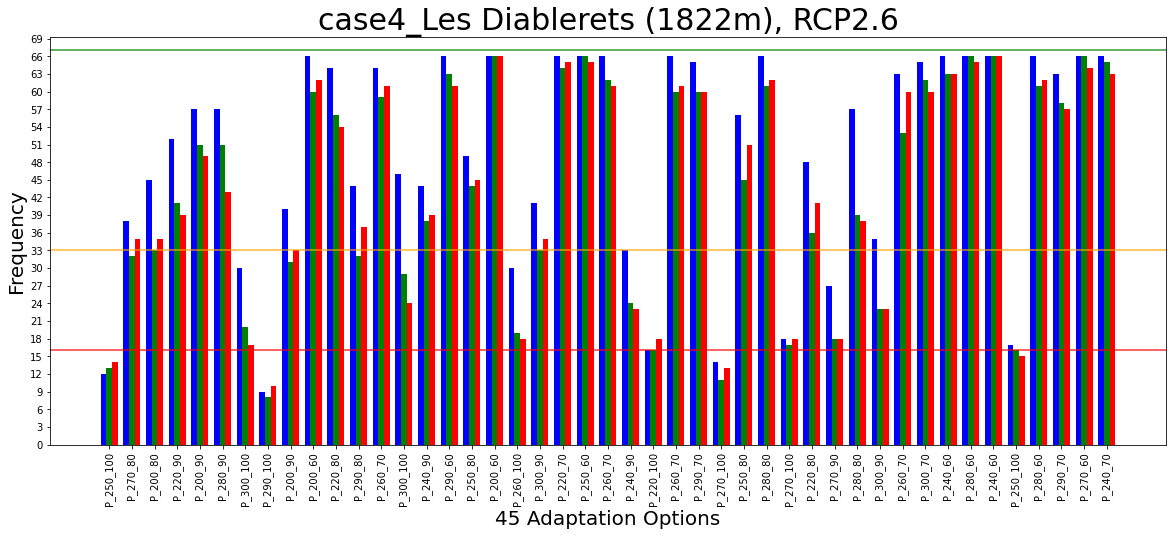

In [25]:
fig35, ax1 = plt.subplots(figsize=(20,7.5))

width = 0.25

ax1.bar(x_26_arr, y_26, width = width, color = 'Blue', label = "2020")
ax1.bar(x1_26_arr, y1_26, width = width, color = 'Green', label = "2050")
ax1.bar(x2_26_arr, y2_26, width = width, color = 'Red', label = "2070")


#X-Axis
xticks = np.arange(0, 45, 1)
ax1.set_xticks(xticks)
#ax1.set_xticks(xticks, all_Policies)

xlabels = all_Policies
#ax1.set_xticklabels(xlabels)
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10, ha="right", rotation_mode="anchor")
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10)
plt.xticks(xticks, xlabels, fontsize=16)
plt.setp(ax1.get_xticklabels(), rotation=90, size = 10)



#Y-Axis
yticks = np.arange(0, 70, 3)
#ax1.set_yticks(yticks)
#plt.setp(ax1.get_yticklabels(), rotation=0, size = 15, ha="right", rotation_mode="anchor")

ax1.set_yticks(yticks)
ax1.set_title(title_Figs + ', RCP2.6', size = 30)
ax1.set_xlabel('45 Adaptation Options', size = 20)
ax1.set_ylabel('Frequency', size = 20)


ax1.axhline(y=67, color='green', alpha=0.8)
ax1.axhline(y=33, color='orange', alpha=0.8)
ax1.axhline(y=16, color='red', alpha=0.8)
#ax1.set_ylim(bottom=0, top =70)
#ax1.y_axis = np.arange(0, 70)

fig35.savefig(os.path.join(rootOut, 'tipping_point_All_new_3_RCP26.tiff'), format='tiff', dpi=150)

In [26]:
x_45_arr = np.array(x_45) - 0.25
x1_45_arr = np.array(x1_45)
x2_45_arr = np.array(x2_45) + 0.25

In [27]:
y2_45

[57.0,
 56.0,
 51.0,
 48.0,
 47.0,
 43.0,
 43.0,
 39.0,
 36.0,
 35.0,
 35.0,
 33.0,
 32.0,
 32.0,
 31.0,
 31.0,
 30.0,
 30.0,
 29.0,
 23.0,
 23.0,
 22.0,
 22.0,
 21.0,
 21.0,
 20.0,
 20.0,
 19.0,
 16.0,
 16.0,
 16.0,
 15.0,
 14.0,
 13.0,
 13.0,
 11.0,
 10.0,
 9.0,
 9.0,
 6.0,
 5.0,
 5.0,
 3.0,
 3.0,
 2.0]

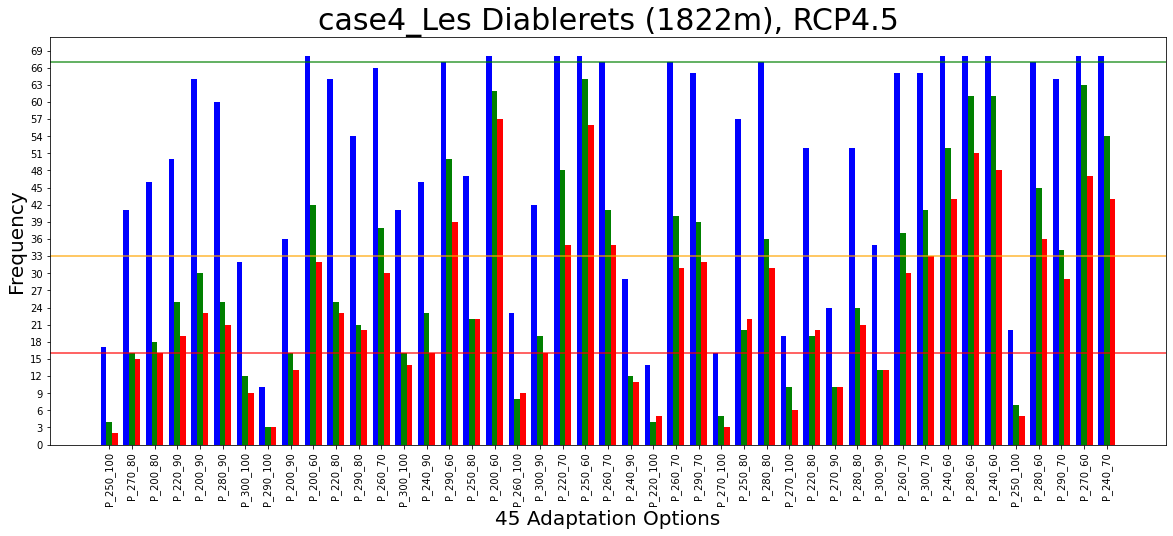

In [28]:
fig36, ax1 = plt.subplots(figsize=(20,7.5))

width = 0.25

ax1.bar(x_45_arr, y_45, width = width, color = 'Blue', label = "2020")
ax1.bar(x1_45_arr, y1_45, width = width, color = 'Green', label = "2050")
ax1.bar(x2_45_arr, y2_45, width = width, color = 'Red', label = "2070")


#X-Axis
xticks = np.arange(0, 45, 1)
ax1.set_xticks(xticks)
#ax1.set_xticks(xticks, all_Policies)

xlabels = all_Policies
#ax1.set_xticklabels(xlabels)
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10, ha="right", rotation_mode="anchor")
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10)
plt.xticks(xticks, xlabels, fontsize=16)
plt.setp(ax1.get_xticklabels(), rotation=90, size = 10)



#Y-Axis
yticks = np.arange(0, 70, 3)
#ax1.set_yticks(yticks)
#plt.setp(ax1.get_yticklabels(), rotation=0, size = 15, ha="right", rotation_mode="anchor")

ax1.set_yticks(yticks)
ax1.set_title(title_Figs + ', RCP4.5', size = 30)
ax1.set_xlabel('45 Adaptation Options', size = 20)
ax1.set_ylabel('Frequency', size = 20)

ax1.axhline(y=67, color='green', alpha=0.8)
ax1.axhline(y=33, color='orange', alpha=0.8)
ax1.axhline(y=16, color='red', alpha=0.8)
#ax1.set_ylim(bottom=0, top =70)
#ax1.y_axis = np.arange(0, 70)
fig36.savefig(os.path.join(rootOut, 'tipping_point_All_new_3_RCP45.tiff'), format='tiff', dpi=150)

In [29]:
x_85_arr = np.array(x_85) - 0.25
x1_85_arr = np.array(x1_85)
x2_85_arr = np.array(x2_85) + 0.25

In [30]:
y2_85

[3.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0]

In [31]:
x2_85_arr

array([17.25, 39.25, 37.25, 38.25, 44.25, 43.25, 26.25, 21.25])

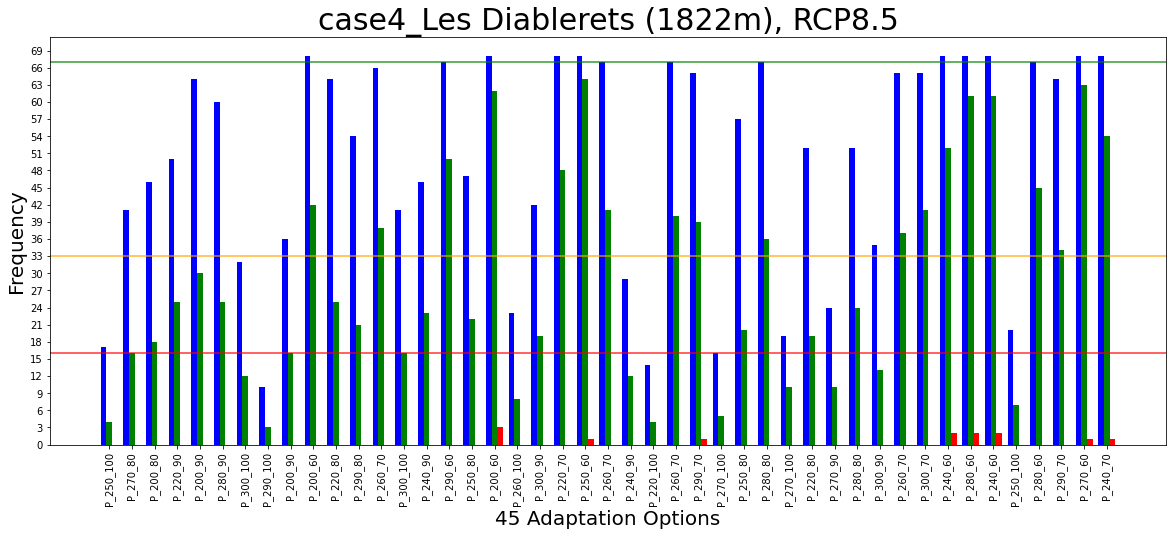

In [32]:
fig37, ax1 = plt.subplots(figsize=(20,7.5))

width = 0.25

ax1.bar(x_85_arr, y_85, width = width, color = 'Blue', label = "2020")
ax1.bar(x1_85_arr, y1_85, width = width, color = 'Green', label = "2050")
ax1.bar(x2_85_arr, y2_85, width = width, color = 'Red', label = "2070")


#X-Axis
xticks = np.arange(0, 45, 1)
ax1.set_xticks(xticks)
#ax1.set_xticks(xticks, all_Policies)

xlabels = all_Policies
#ax1.set_xticklabels(xlabels)
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10, ha="right", rotation_mode="anchor")
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10)
plt.xticks(xticks, xlabels, fontsize=16)
plt.setp(ax1.get_xticklabels(), rotation=90, size = 10)



#Y-Axis
yticks = np.arange(0, 70, 3)
#ax1.set_yticks(yticks)
#plt.setp(ax1.get_yticklabels(), rotation=0, size = 15, ha="right", rotation_mode="anchor")

ax1.set_yticks(yticks)
ax1.set_title(title_Figs + ', RCP8.5', size = 30)
ax1.set_xlabel('45 Adaptation Options', size = 20)
ax1.set_ylabel('Frequency', size = 20)

ax1.axhline(y=67, color='green', alpha=0.8)
ax1.axhline(y=33, color='orange', alpha=0.8)
ax1.axhline(y=16, color='red', alpha=0.8)
#ax1.set_ylim(bottom=0, top =70)
#ax1.y_axis = np.arange(0, 70)
fig37.savefig(os.path.join(rootOut, 'tipping_point_All_new_3_RCP85.tiff'), format='tiff', dpi=150)